In [1]:
from matplotlib.pyplot import figure
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image as pil_image

# Determine the size of each image
from os.path import isfile

%matplotlib inline

# BackGround

After centuries of intense whaling, recovering whale populations still have a hard time adapting to warming oceans and struggle to compete every day with the industrial fishing industry for food.

To aid whale conservation efforts, scientists use photo surveillance systems to monitor ocean activity. They use the shape of whales’ tails and unique markings found in footage to identify what species of whale they’re analyzing and meticulously log whale pod dynamics and movements. For the past 40 years, most of this work has been done manually by individual scientists, leaving a huge trove of data untapped and underutilized.

In this competition, you’re challenged to build an algorithm to identify individual whales in images. You’ll analyze Happywhale’s database of over 25,000 images, gathered from research institutions and public contributors. By contributing, you’ll help to open rich fields of understanding for marine mammal population dynamics around the globe.

Note, this competition is similar in nature to this competition with an expanded and updated dataset.

We'd like to thank Happywhale for providing this data and problem. Happywhale is a platform that uses image process algorithms to let anyone to submit their whale photo and have it automatically identified. 

# Goal
*Identify a Whale by its tail.* 

# Dataset Description

This training data contains thousands of images of humpback whale flukes. Individual whales have been identified by researchers and given an Id. The challenge is to predict the whale Id of images in the test set. What makes this such a challenge is that there are only a few examples for each of 3,000+ whale Ids.

# File descriptions

* train.zip - a folder containing the training images
* train.csv - maps the training Image to the appropriate whale Id. Whales that are not predicted to have a label identified * in the training data should be labeled as new_whale.
* test.zip - a folder containing the test images to predict the whale Id
* sample_submission.csv - a sample submission file in the correct format


## Showing some images

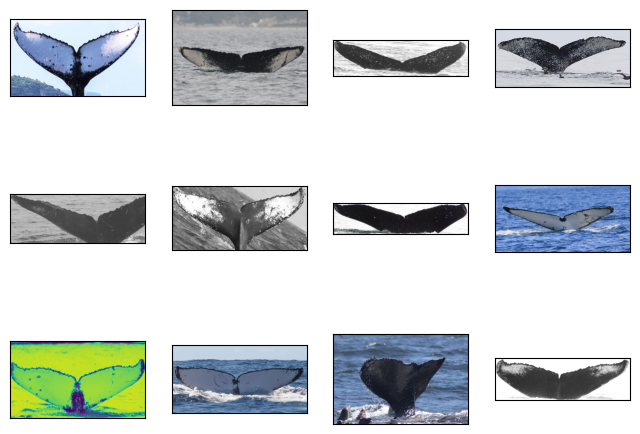

In [2]:
import os
fig = plt.figure(figsize=(8, 8 ), dpi=100,facecolor='w', edgecolor='k')
train_imgs = os.listdir("./train/")
for idx, img in enumerate(np.random.choice(train_imgs, 12)):
    ax = fig.add_subplot(4, 20//5, idx+1, xticks=[], yticks=[])
    im = pil_image.open("./train/" + img)
    plt.imshow(im)

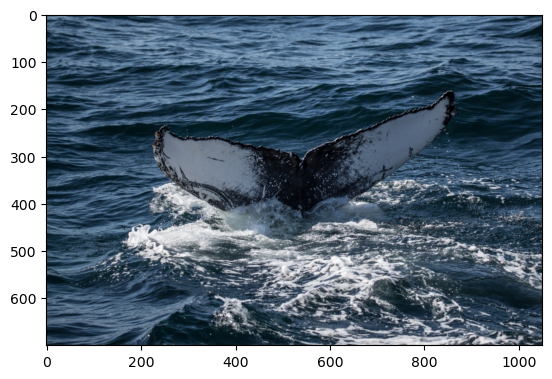

In [3]:
import cv2
# If you need to install CV: https://stackoverflow.com/questions/19876079/cannot-find-module-cv2-when-using-opencv
# helpful: https://stackoverflow.com/questions/54959387/rgb-image-display-in-matplotlib-plt-imshow-returns-a-blue-image
im = cv2.imread("./train/"+train_imgs[0] , 1)

image = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

pixels = np.array(image)

plt.imshow(pixels)
plt.show()

## Importing Dataset

In [4]:
# load image data
#image name
train_df = pd.read_csv('./train.csv')
train_df.head(10)

,Image,Id
0,0000e88ab.jpg,w_f48451c
1,0001f9222.jpg,w_c3d896a
2,00029d126.jpg,w_20df2c5
3,00050a15a.jpg,new_whale
4,0005c1ef8.jpg,new_whale
5,0006e997e.jpg,new_whale
6,000a6daec.jpg,w_dd88965
7,000f0f2bf.jpg,new_whale
8,0016b897a.jpg,w_64404ac
9,001c1ac5f.jpg,w_a6f9d33


In [5]:
train_df.tail(10)

,Image,Id
25351,ffd61cded.jpg,new_whale
25352,ffd7a6f5a.jpg,w_84c23bb
25353,ffdddcc0f.jpg,new_whale
25354,ffe52d320.jpg,w_bc285a6
25355,ffe7560cd.jpg,w_6d8b67b
25356,ffef89eed.jpg,w_9c506f6
25357,fff7faf61.jpg,w_9cf0388
25358,fff9002e0.jpg,w_bd1c3d5
25359,fffcde6fe.jpg,w_9f30885
25360,fffde072b.jpg,new_whale


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25361 entries, 0 to 25360
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Image   25361 non-null  object
 1   Id      25361 non-null  object
dtypes: object(2)
memory usage: 396.4+ KB


In [7]:
# rows and columns
train_df.shape

(25361, 2)

In [8]:
train_df.shape[0]

25361

In [9]:
train_df.describe()

,Image,Id
count,25361,25361
unique,25361,5005
top,0000e88ab.jpg,new_whale
freq,1,9664


In [10]:
# Top 10 labels
train_df["Id"].value_counts()[:10]

Id
new_whale    9664
w_23a388d      73
w_9b5109b      65
w_9c506f6      62
w_0369a5c      61
w_700ebb4      57
w_3de579a      54
w_564a34b      51
w_fd3e556      50
w_88e4537      49
Name: count, dtype: int64

In [11]:
# topTen = ["new_whale","w_23a388d",'w_9b5109b','w_9c506f6','w_0369a5c','w_700ebb4','w_3de579a','w_564a34b','w_fd3e556','w_88e4537']

### Creating x_train and y_train

In [12]:
y_train = train_df["Id"]

# drop the id column
X_train = train_df.drop(['Id'], axis=1)
print(y_train[0])
y_train.head()

w_f48451c


0    w_f48451c
1    w_c3d896a
2    w_20df2c5
3    new_whale
4    new_whale
Name: Id, dtype: object

In [13]:
X_train.head()

,Image
0,0000e88ab.jpg
1,0001f9222.jpg
2,00029d126.jpg
3,00050a15a.jpg
4,0005c1ef8.jpg


## Prepareing images
Prepocess



In [14]:
# from keras.preprocessing import image
import keras.utils as image
from keras.applications.imagenet_utils import preprocess_input

2023-04-30 22:05:07.521768: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-30 22:05:08.048816: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [15]:
# # list that holds elemnts given that are list of 100 of list of 100 with 3 elements
# x_train = np.zeros((2, 4,3,5))

# print(x_train)

In [16]:
def prepareImages(train, shape, path):
    # list that holds elemnts given that are list of 100 of list of 100 with 3 elements
    # i.e.   num of images of size 100x100x3 
    X_train = np.zeros((shape, 100, 100, 3))
    count = 0
    
    # helpful link: https://www.tensorflow.org/api_docs/python/tf/keras/utils/img_to_array
    for i in train['Image']:
        # print(fig)
        
        #load images into images of size 100x100x3
        # helpful link: https://www.tensorflow.org/api_docs/python/tf/keras/utils/load_img
        img = image.load_img("./"+path+"/"+i, target_size=(100, 100, 3))
        x = image.img_to_array(img)
        x = preprocess_input(x)
        # print(x)

        X_train[count] = x
        if (count < 10):
            print("Image:", i, "processed")
        count += 1
    
    return X_train

In [17]:
X_train = prepareImages(train_df, train_df.shape[0], "train")

Image: 0000e88ab.jpg processed
Image: 0001f9222.jpg processed
Image: 00029d126.jpg processed
Image: 00050a15a.jpg processed
Image: 0005c1ef8.jpg processed
Image: 0006e997e.jpg processed
Image: 000a6daec.jpg processed
Image: 000f0f2bf.jpg processed
Image: 0016b897a.jpg processed
Image: 001c1ac5f.jpg processed


## Normalize the data

In [18]:
# simply normalize the features to the range of [0,1]:

X_train = X_train.astype('float32')
X_train /= 255.0

In [19]:
print(X_train.shape)

(25361, 100, 100, 3)


In [20]:
print(X_train)

[[[[-5.85843250e-02 -1.95211768e-01 -3.20313722e-01]
   [-2.72117760e-02 -1.71682343e-01 -2.92862743e-01]
   [ 3.94548886e-02 -1.05015680e-01 -2.18352944e-01]
   ...
   [-3.68236471e-03 -1.55996069e-01 -2.77176470e-01]
   [-1.80152953e-01 -3.12858820e-01 -4.26196069e-01]
   [ 3.94548886e-02 -1.08937249e-01 -2.37960786e-01]]

  [[ 1.33572534e-01 -1.08980369e-02 -1.47764713e-01]
   [ 2.00239211e-01  6.36117682e-02 -6.14901967e-02]
   [-7.60393310e-03 -1.63839206e-01 -2.96784312e-01]
   ...
   [ 8.08234140e-03 -1.63839206e-01 -2.81098038e-01]
   [ 9.04352814e-02 -8.93294066e-02 -2.18352944e-01]
   [ 5.12195975e-02 -1.20701961e-01 -2.45803922e-01]]

  [[-2.32902076e-02 -1.67760774e-01 -2.88941175e-01]
   [ 8.65137130e-02 -6.97215647e-02 -1.98745102e-01]
   [-3.68236471e-03 -1.52074501e-01 -2.81098038e-01]
   ...
   [ 8.65137130e-02 -8.14862698e-02 -2.14431375e-01]
   [ 1.25729397e-01 -5.40352911e-02 -1.83058828e-01]
   [ 2.23768622e-01  5.57686314e-02 -7.71764740e-02]]

  ...

  [[-3.50549

In [21]:
print(X_train.shape)

(25361, 100, 100, 3)


### Display some images

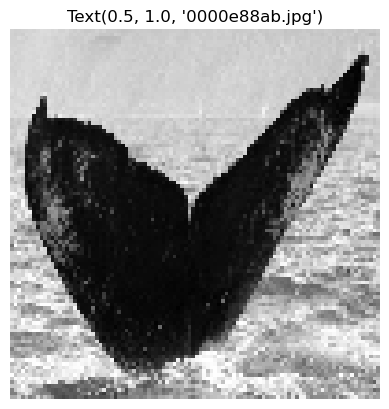

In [22]:

# https://stackoverflow.com/questions/40557910/plt-plot-meaning-of-0-and-1
# print(X_train[2][:,:])
plt.imshow(X_train[2][:,:,0], cmap="gray")
plt.title(plt.title(train_df.iloc[0,0]))
plt.axis("off")
plt.show()



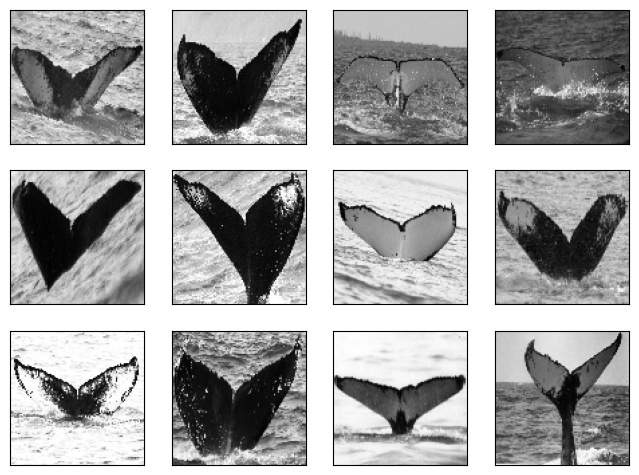

In [23]:
fig = plt.figure(figsize=(8, 8 ), dpi=100,facecolor='w', edgecolor='k')
train_imgs = os.listdir("./train/")
# show the first 12 images
for idx, img in enumerate(np.random.choice(train_imgs, 12)):
    ax = fig.add_subplot(4, 20//5, idx+1, xticks=[], yticks=[])
    plt.imshow(X_train[idx+1][:,:,0], "gray")
    

### Encoding Label

The labels are IDs such as "w_f48451c" so we need to encode them.

In [24]:
print(y_train.shape)

(25361,)


In [25]:
print(y_train[0])

w_f48451c


In [26]:
train_df.Id.describe()

count         25361
unique         5005
top       new_whale
freq           9664
Name: Id, dtype: object

In [27]:
from keras.utils import np_utils 
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

In [28]:
y_train = label_encoder.fit_transform(y_train)
# THe zeros indicate new whales
y_train[0:10]  

array([4786, 3808,  662,    0,    0,    0, 4315,    0, 1929, 3237])

In [29]:
y_train = np_utils.to_categorical(y_train, 5005)

In [30]:
# (rows, cols)
print(y_train.shape)

(25361, 5005)


In [31]:
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [32]:
# np.random.seed(0)

## Defining the Network Archetecture (model)

In [33]:


# THis model is so we can stack neural net3orks
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Convolution2D, MaxPooling2D,Conv2D, AveragePooling2D
from tensorflow.keras.layers import BatchNormalization


In [34]:

# The Sequential model for the network
model = Sequential()

2023-04-30 22:07:26.092200: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0a:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-04-30 22:07:26.131266: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0a:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-04-30 22:07:26.131607: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0a:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-04-30 22:07:26.134522: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0a:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-04-30 22:07:26.134819: I tensorflow/compile

In [35]:
# model.add(Conv2D(32, (5, 5), strides = (2, 2), input_shape = (100, 100, 3)))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(MaxPooling2D((2, 2)))

# model.add(Conv2D(64, (3, 3), strides = (2,2)))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(AveragePooling2D((3, 3)))

# model.add(Flatten())
# model.add(Dense(100, activation="relu"))
# model.add(Dropout(0.75))
# model.add(Dense(y_train.shape[1], activation='softmax'))

# model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
# model.summary()

In [36]:
# CNN first layer with 16 output filters with 5x5 convoltion ( kernal_size) 
model.add(Convolution2D(filters = 16, kernel_size = (5,5),padding="same", input_shape = (100,100,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
print(model.output_shape)

model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
print(model.output_shape)

# Dropout layer to avoid overfitting
# model.add(Dropout(0.25)) 


(None, 100, 100, 16)
(None, 50, 50, 16)


In [37]:


# adding hidden layers
model.add(Convolution2D(filters  = 32,kernel_size  = (3, 3) ,strides=2,padding="same"))
model.add(BatchNormalization())
model.add(Activation('relu'))
print(model.output_shape)

# Pooling Layer
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
print(model.output_shape)


(None, 25, 25, 32)
(None, 12, 12, 32)


In [38]:
# gonna do the same as last layer
model.add(Convolution2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(BatchNormalization())
model.add(Activation('relu'))
print(model.output_shape)

model.add(MaxPooling2D(pool_size = (2,2), strides=(2,2)))
print(model.output_shape)

(None, 12, 12, 64)
(None, 6, 6, 64)


In [39]:


# output Fully connected Dense layers:
model.add(Flatten())
print(model.output_shape)

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Activation('relu'))
print(model.output_shape)

model.add(Dropout(0.5))
model.add(BatchNormalization())
# output layer that will categorize the images  usubng the amount of unique nodes
model.add(Dense(y_train.shape[1], activation='softmax'))
print(model.output_shape)



(None, 2304)
(None, 128)
(None, 5005)


In [40]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 16)      1216      
                                                                 
 batch_normalization (BatchN  (None, 100, 100, 16)     64        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 100, 100, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 32)        4640      
                                                                 
 batch_normalization_1 (Batc  (None, 25, 25, 32)       1

## Compile Model

In [41]:
# Adam will change the learning rate during training
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')

In [42]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 16)      1216      
                                                                 
 batch_normalization (BatchN  (None, 100, 100, 16)     64        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 100, 100, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 32)        4640      
                                                                 
 batch_normalization_1 (Batc  (None, 25, 25, 32)       1

# Training

In [43]:
epochs = 100  
batch_size = 100

In [44]:
# from tensorflow.keras.utils import Sequence
# import numpy as np   

# class DataGenerator(Sequence):
#     def __init__(self, x_set, y_set, batch_size):
#         self.x, self.y = x_set, y_set
#         self.batch_size = batch_size

#     def __len__(self):
#         return int(np.ceil(len(self.x) / float(self.batch_size)))

#     def __getitem__(self, idx):
#         batch_x = self.x[idx * self.batch_size:(idx + 1) * self.batch_size]
#         batch_y = self.y[idx * self.batch_size:(idx + 1) * self.batch_size]
#         return batch_x, batch_y

# train_gen = DataGenerator(X_train, y_train, 32)
# test_gen = DataGenerator(X_test, y_test, 32)


# history = model.fit(train_gen,
#                     epochs=6,
#                     validation_data=test_gen)

In [51]:
import tensorflow
# name='/physical_device:GPU:0'
# '/device:GPU:0'
with tensorflow.device('/device:GPU:0'):
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)

2023-04-30 22:07:58.445827: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 3043320000 exceeds 10% of free system memory.
2023-04-30 22:07:59.527004: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 3043320000 exceeds 10% of free system memory.


Epoch 1/100


2023-04-30 22:08:02.580711: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-04-30 22:08:04.333127: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-04-30 22:08:04.986993: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-04-30 22:08:05.018446: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x55af30915100 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-04-30 22:08:05.018503: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Ti, Compute Capability 8.6
2023-04-30 22:08:05.069175: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-04-30 22:08:05.37

254/254 [==============================] - 12s 19ms/step - loss: 7.1283 - accuracy: 0.2749
Epoch 2/100
254/254 [==============================] - 4s 17ms/step - loss: 5.6145 - accuracy: 0.3794
Epoch 3/100
254/254 [==============================] - 4s 17ms/step - loss: 5.3788 - accuracy: 0.3799
Epoch 4/100
254/254 [==============================] - 4s 17ms/step - loss: 5.1902 - accuracy: 0.3806
Epoch 5/100
254/254 [==============================] - 4s 16ms/step - loss: 5.0070 - accuracy: 0.3805
Epoch 6/100
254/254 [==============================] - 4s 17ms/step - loss: 4.8137 - accuracy: 0.3804
Epoch 7/100
254/254 [==============================] - 4s 16ms/step - loss: 4.6364 - accuracy: 0.3811
Epoch 8/100
254/254 [==============================] - 4s 17ms/step - loss: 4.4507 - accuracy: 0.3814
Epoch 9/100
254/254 [==============================] - 4s 17ms/step - loss: 4.2713 - accuracy: 0.3815
Epoch 10/100
254/254 [==============================] - 4s 16ms/step - loss: 4.0887 - accurac

### Model evaluation/Visualization

dict_keys(['loss', 'accuracy'])


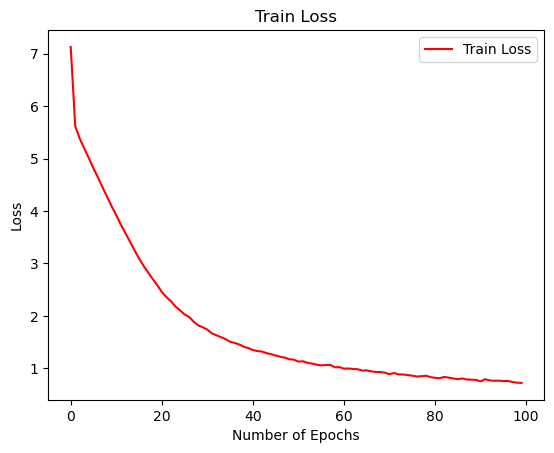

In [52]:
print(history.history.keys())

# Plot the loss curve for training
plt.plot(history.history['loss'], label='Train Loss', color='r')
plt.title("Train Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()



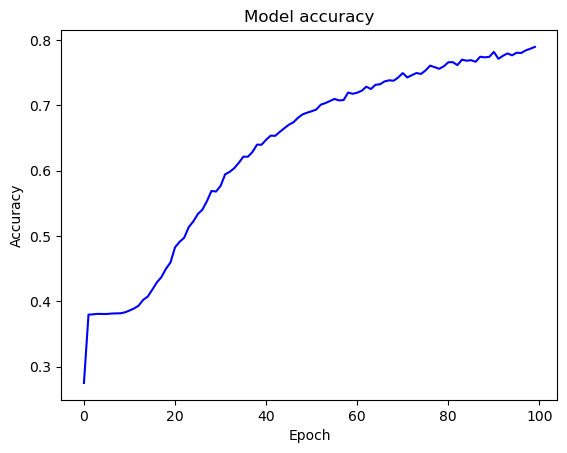

In [53]:
plt.plot(history.history['accuracy'],label='Model accuracy', color='b')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [54]:

print('Accurracy of model in training: ',max(history.history['accuracy'])) 


Accurracy of model in training:  0.7894010543823242


## Testing

In [55]:
test = os.listdir("./test/")
print(len(test))

7960


In [56]:
col = ['Image']
test_data = pd.DataFrame(test, columns=col)
test_data['Id'] = ''

In [57]:
x_test = prepareImages(test_data, test_data.shape[0], "test")
x_test /= 255

Image: 00028a005.jpg processed
Image: 000dcf7d8.jpg processed
Image: 000e7c7df.jpg processed
Image: 0019c34f4.jpg processed
Image: 001a4d292.jpg processed
Image: 00247bc36.jpg processed
Image: 0027089a4.jpg processed
Image: 002de4d94.jpg processed
Image: 002f52f0c.jpg processed
Image: 002fd89d4.jpg processed


In [58]:
predictions = model.predict(np.array(x_test), verbose=1)

2023-04-30 22:16:50.929076: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 955200000 exceeds 10% of free system memory.
2023-04-30 22:16:52.333291: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 955200000 exceeds 10% of free system memory.


249/249 [==============================] - 3s 3ms/step


In [59]:
for i, pred in enumerate(predictions):
    test_data.loc[i, 'Id'] = ' '.join(label_encoder.inverse_transform(pred.argsort()[-5:][::-1]))

In [60]:
test_data.head(10)
test_data.to_csv('submission_3.csv', index=False)